<h2>Indice</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Importando los datos</a></li>
    <li><a href="https://#pattern_visualization">Análisis de patrones de características individuales mediante visualización</a></li>
    <li><a href="https://#discriptive_statistics">Analisis Estadistico Descriptivo</a></li>
    <li><a href="https://#basic_grouping">Conceptos Basicos de Agrupamiento</a></li>
    <li><a href="https://#correlation_causation">Correlación y Causalidad</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
</ol>

</div>

<hr>


In [1]:
# Importacion de librerias
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [3]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print(50 * '-')
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_),
            metrics.silhouette_score(data, model.labels_)))

In [4]:
# Carga del conjunto de datos

fruits  = pd.read_table('fruit_data_with_colors_dos.txt')
#fruits  = pd.read_csv('fruit_data_with_colors_dos.csv')
#X_fruits = fruits[['mass', 'width', 'height', 'color_score']]
#y_fruits = fruits[['fruit_label']]

In [5]:
fruits.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,86,6.2,4.7,0.80


In [6]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [7]:
#visualizar solo las filas únicas de estas dos columnas
df_unique = fruits.drop_duplicates(subset=["fruit_label", "fruit_name"])
print(df_unique)

    fruit_label fruit_name   fruit_subtype  mass  width  height  color_score
0             1      apple    granny_smith   192    8.4     7.3         0.55
3             2   mandarin        mandarin    86    6.2     4.7         0.80
33            3     orange   spanish_jumbo   342    9.0     9.4         0.75
52            4      lemon  spanish_belsan   194    7.2    10.3         0.70


In [8]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,86,6.2,4.7,0.80
5,2,mandarin,mandarin,86,6.2,4.7,0.80
6,2,mandarin,mandarin,84,6.0,4.6,0.79
7,2,mandarin,mandarin,84,6.0,4.6,0.79
8,2,mandarin,mandarin,84,6.0,4.6,0.79
9,2,mandarin,mandarin,80,5.8,4.3,0.77


In [9]:
#X_fruits.head(10)

In [10]:
#y_fruits

In [11]:
fruits.shape

(340, 7)

##  Mezclar la base de datos

In [12]:
#fruits = fruits.sample(frac=1).reset_index(drop=True)
#fruits.head(10)

In [13]:
fruits['fruit_name'].value_counts()

orange      95
apple       95
lemon       80
mandarin    70
Name: fruit_name, dtype: int64

<h2 id="pattern_visualization">2. Análisis de patrones de características individuales mediante visualización</h2>
- Para instalar seaborn usamos  pip que es el administrador de paquetes de python.

In [14]:
! pip install seaborn

## listar  de los tipos de datos para cada columna

In [15]:
fruits.info()
#print(fruits.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    340 non-null    int64  
 1   fruit_name     340 non-null    object 
 2   fruit_subtype  340 non-null    object 
 3   mass           340 non-null    int64  
 4   width          340 non-null    float64
 5   height         340 non-null    float64
 6   color_score    340 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 16.0+ KB


In [16]:
fruits.isna().sum().sort_values()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

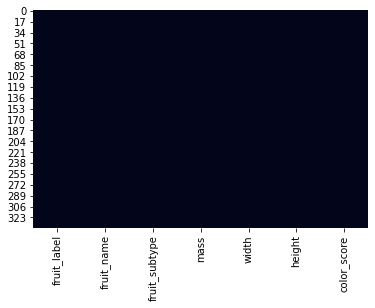

In [17]:
# Identificamos los valores faltantantes visualmente
import seaborn as sns
sns.heatmap(fruits.isnull(), cbar=False)

## calcular la correlación entre variables de tipo “int64” o “float64” utilizando el método “corr”:

In [18]:
fruits.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.106448,-0.184130,0.480975,-0.326251
mass,0.106448,1.000000,0.904057,0.718894,-0.140929
width,-0.184130,0.904057,1.000000,0.573896,-0.135044
height,0.480975,0.718894,0.573896,1.000000,-0.281394
color_score,-0.326251,-0.140929,-0.135044,-0.281394,1.000000


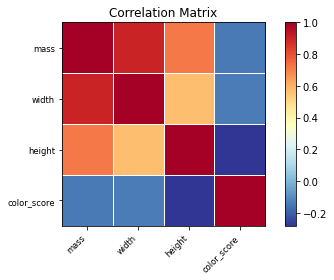

In [19]:
# ** Matriz de Correlación**
import statsmodels.api as sm
import scipy
corr = fruits.set_index('fruit_label').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [20]:
# Statistical data visualization
#import matplotlib.pyplot as plt # For creating visualizations in Python
#3import seaborn as sns # For creating statistical visualizations in Python
#from pylab import rcParams # rcParams module from the PyLab library, which allows you to customize the properties of your visualizations
#rcParams['figure.figsize'] = 14, 8 # Figures created by Pyplot to 14 inches by 8 inches

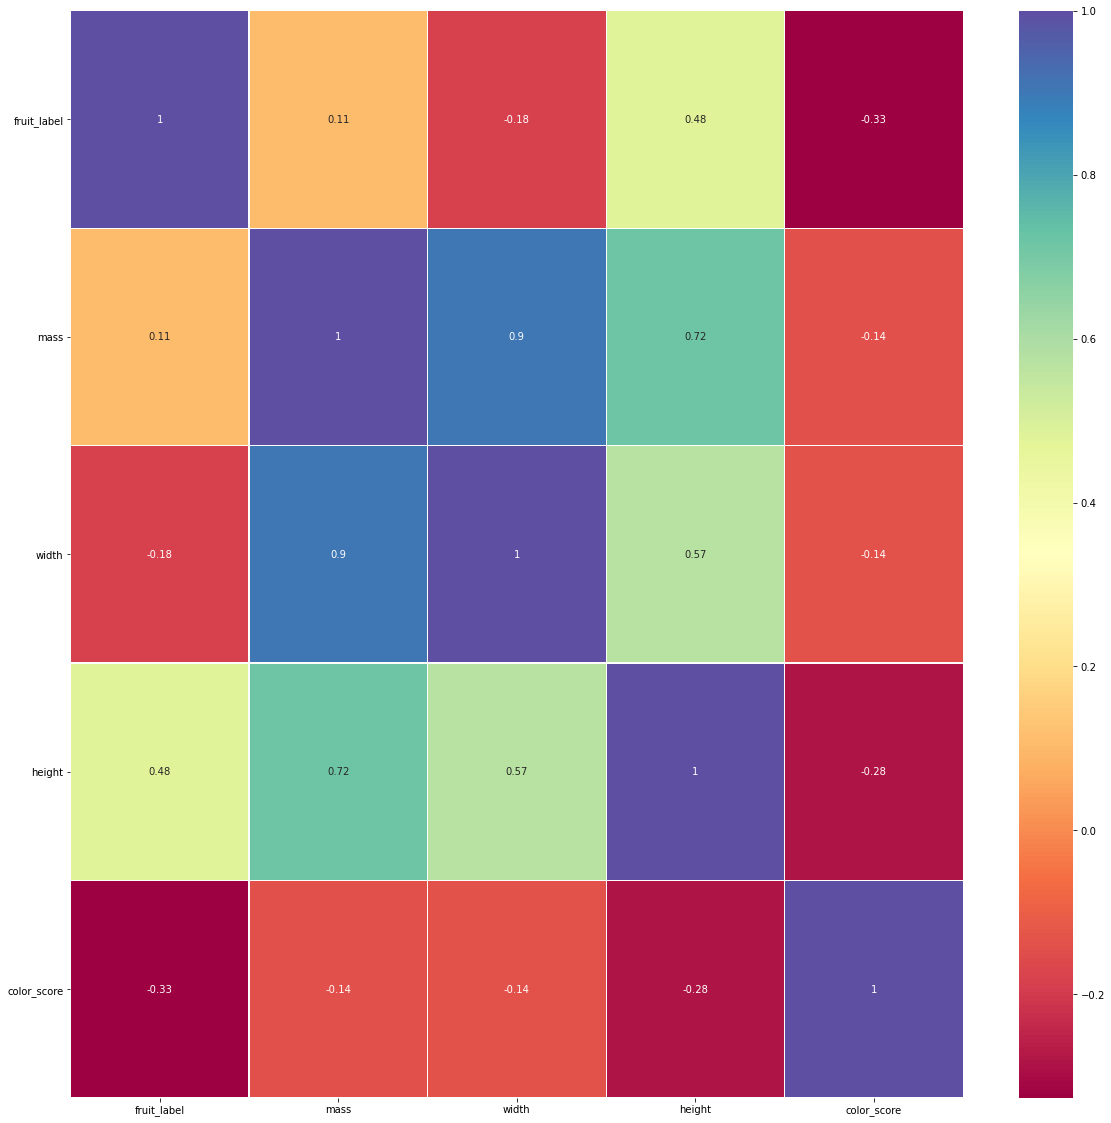

In [21]:
# Creating a correlation heatmap
sns.heatmap(fruits.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B5BF7D8>,
      dtype=object)

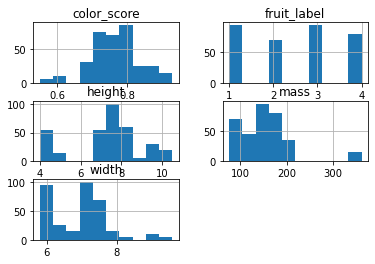

In [22]:
#visualizar la distribución de  cada variable cuantitativa usando un histograma.
fruits.hist()

Histograma. Compuesto por barras verticales que representan el número o la frecuencia de observaciones en diferentes rangos de valores para esa variable. El eje x del histograma representa los valores de la variable, mientras que el eje y representa la frecuencia o la densidad de observaciones.

Si la distribución de la variable sigue una forma de campana, entonces se dice que sigue una distribución normal o gaussiana. La distribución se verá como una forma simétrica con la mayoría de las observaciones cerca de la media y un número menor de observaciones en los extremos

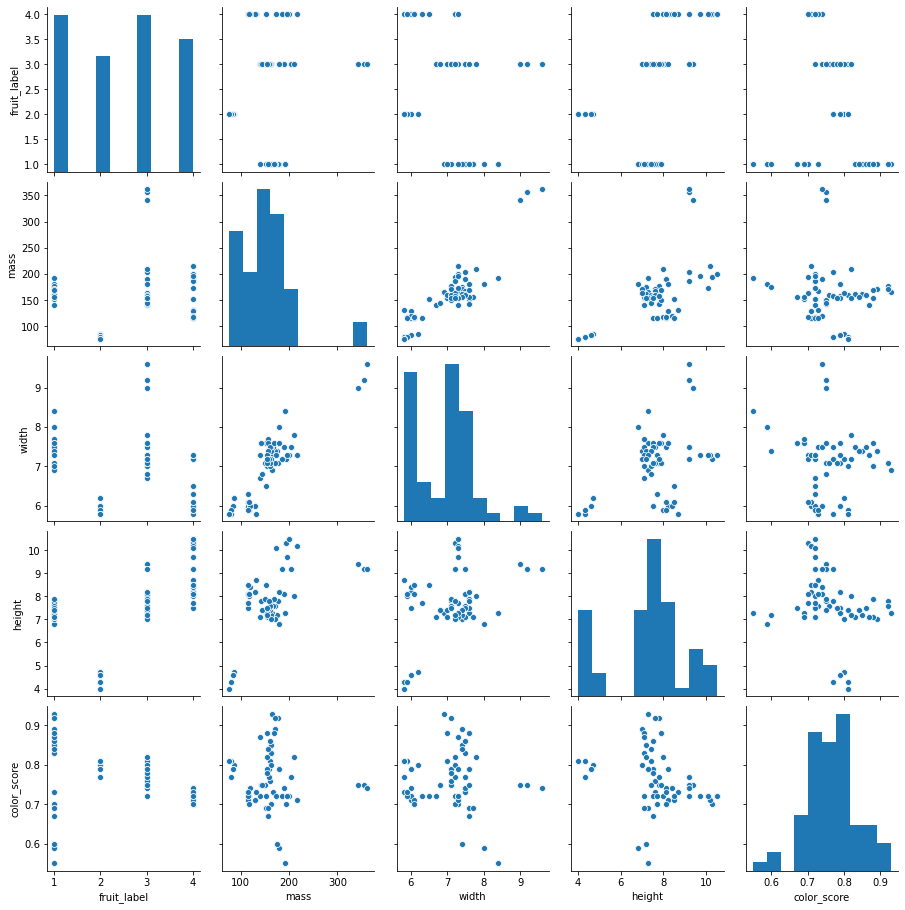

In [23]:
# Visualizar la relación entre todas las variables utilizando una matriz de diagramas de dispersión
sns.pairplot(fruits)

## Variables numéricas continuas:

## Relación lineal positiva
- Diagrama de dispersión de “masa y el ancho"

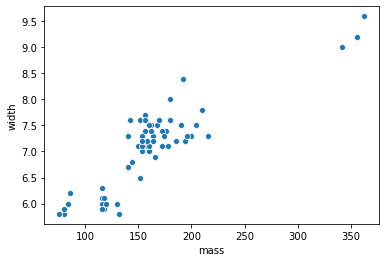

In [24]:
# Visualizar la relación entre dos variables usando un diagrama de dispersión, sin regresión
sns.scatterplot(x='mass', y='width', data=fruits)

(0.0, 376.3)

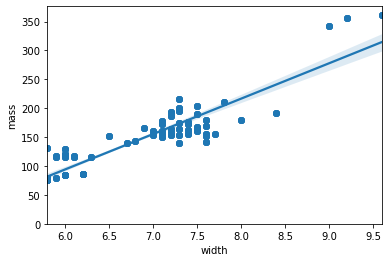

In [25]:
# masa como posible variable de predicción del ancho de la fruta, con Liena una de Regresión
sns.regplot(x="width", y="mass", data=fruits)
plt.ylim(0,)

In [26]:
fruits[['mass', 'width']].corr()

,mass,width
mass,1.000000,0.904057
width,0.904057,1.000000


En la medida que aumenta la masa de la fruta, aumenta el ancho: indica una **correlación directa positiva** entre estas dos variables. masa como posible variable de predicción del ancho de la fruta ya que la línea de regresión es casi una línea diagonal perfecta.

- Podemos examinar la correlación entre masa y el ancho de la fruta y ver que es aproximadamente 0.90

## Relación inversa/negativa

"Alto de la fruta" es una posible variable que pronostique el color

In [27]:
fruits[['height', 'color_score']].corr()

,height,color_score
height,1.000000,-0.281394
color_score,-0.281394,1.000000


(0.0, 0.9490000000000001)

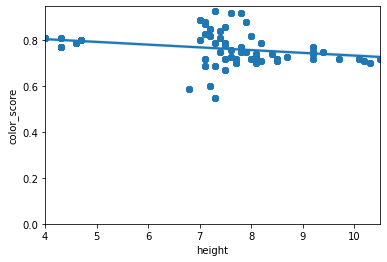

In [28]:
sns.regplot(x="height", y="color_score", data=fruits)
plt.ylim(0,)

En la medida que aumenta alto de la fruta, el color va disminuyendo: 
- Indica un relación inversa/negativa entre estas dos atributos. el alto podria en cierta medida podria predecir el color de la fruta.
- la correlación entre 'height' y 'color_score' es aprox: imandamente -0.28

## Relación Lineal Débil**

In [29]:
fruits[['width', 'fruit_label']].corr()

,width,fruit_label
width,1.00000,-0.18413
fruit_label,-0.18413,1.00000


(0.0, 4.15)

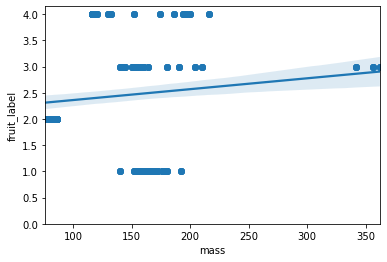

In [30]:
sns.regplot(x="mass", y="fruit_label", data=fruits)
plt.ylim(0,)

La masa de la fruta no parecen ser un buen predictor del tipo de fruta, ya que la línea de regresión está cerca de la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, lo que muestra mucha variabilidad. Por lo tanto, no es una variable confiable.

In [31]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

## Variables categóricas

- Estas son variables que describen una ‘característica’ de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo “objeto” o “int64”. Una buena forma de visualizar variables categóricas es mediante el uso de diagramas de caja.

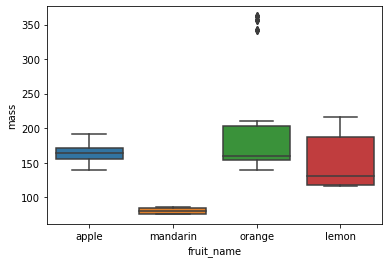

In [32]:
# Veamos la relación entre:
sns.boxplot(x="fruit_name", y="mass", data=fruits)

Se Observa que la distribucion de la masa entre las diferentes clases de frutas tienen una superposición significativa a diferencia de la mandarina por lo que la masa no sería un buen predictor para el nombre de la fruta. 

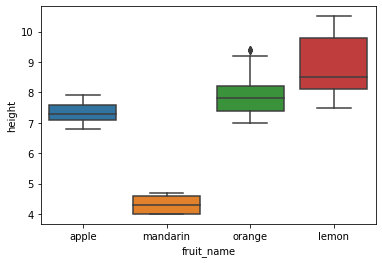

In [33]:
sns.boxplot(x="fruit_name", y="height", data=fruits)

Se observa que la distribución del alto entre las clses de frutas, es un poco distinta como para tomar el alto de la fruta como un posible predictor del nombre de la fruta.

## Análisis Estadístico Descriptivo 

Describe automáticamente calcula estadísticas básicas para todas las variables continuas

- Muestra el recuento de esa variable, la media, la desviación estándar (std), 
el valor mínimo,el IQR (rango intercuartil: 25%, 50% y 75%), el valor máximo
fruits.describe()

In [34]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,340.000000,340.000000,340.000000,340.000000,340.000000
mean,2.470588,152.235294,6.950000,7.251471,0.767059
std,1.132395,58.055542,0.855918,1.696647,0.072096
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,116.000000,6.075000,7.075000,0.720000
50%,3.000000,155.000000,7.100000,7.500000,0.770000
75%,3.000000,172.500000,7.425000,8.100000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [35]:
#Desscribe” en las variables de tipo ‘objeto
fruits.describe(include=['object'])

,fruit_name,fruit_subtype
count,340,340
unique,4,10
top,orange,mandarin
freq,95,70


In [36]:
# Contar Valores
fruits['fruit_name'].value_counts()

orange      95
apple       95
lemon       80
mandarin    70
Name: fruit_name, dtype: int64

In [37]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

## 4. Calcular el volumen de las frutas en un conjunto de datos en Python:

- si se conoce la masa de la fruta, su ancho y alto, y tienes una estimación de su densidad promedio, puedes utilizar la siguiente fórmula para obtener una aproximación de su volumen:

V = m / (d * l * a)
Donde m es la masa de la fruta, d es la densidad promedio de la fruta y l y a son el ancho y alto de la fruta, respectivamente.

In [38]:
#g/cm^3
densidad_promedio = 0.8 

In [39]:
volumenes = fruits['mass']/(densidad_promedio * fruits['width'] * fruits['height'])

In [40]:
fruits['volumen'] = volumenes
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,volumen
0,1,apple,granny_smith,192,8.4,7.3,0.55,3.913894
1,1,apple,granny_smith,180,8.0,6.8,0.59,4.136029
2,1,apple,granny_smith,176,7.4,7.2,0.60,4.129129
3,2,mandarin,mandarin,86,6.2,4.7,0.80,3.689087
4,2,mandarin,mandarin,86,6.2,4.7,0.80,3.689087
...,...,...,...,...,...,...,...,...
335,4,lemon,unknown,116,6.1,8.5,0.71,2.796528
336,4,lemon,unknown,116,6.3,7.7,0.72,2.989074
337,4,lemon,unknown,116,5.9,8.1,0.73,3.034108
338,4,lemon,unknown,152,6.5,8.5,0.72,3.438914


## 5. Conceptos Basicos de Agrupamiento

- El método “groupby” agrupa los datos por diferentes categorías. Los datos se agrupan en función de una o varias variables y el análisis se realiza en los grupos individuales.

- Por ejemplo, agrupemos por la variable “fruit_name”. Sabemos que hay 4 clases de diferentes de subtipo de frutas.

In [41]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

Si queremos saber, en promedio, el volumen de una fruta, podemos agrupar fruit name y luego promediarlas.

In [42]:
fruits_group_one = fruits[['fruit_name','mass','width','height','volumen']]

Luego podemos calcular la masa y el ancho para cada una de las diferentes clases de frutas.

In [43]:
# resultados del agrupamiento
fruits_group_one = fruits_group_one.groupby(['fruit_name'],as_index=False).mean()
fruits_group_one

,fruit_name,mass,width,height,volumen
0,apple,165.052632,7.457895,7.342105,3.773900
1,lemon,150.000000,6.512500,8.856250,3.201097
2,mandarin,81.000000,5.935714,4.364286,3.916439
3,orange,193.789474,7.557895,7.936842,3.907930


## 6. Correlación y causalidad 

<p><b>Correlación:</b> una medida del grado de interdependencia entre variables.</p>

<p><b>Causalidad:</b> la relación entre causa y efecto entre dos variables.</p>

<p>Es importante saber la diferencia entre estos dos y que la correlación no implica causalidad. Determinar la correlación es mucho más simple que la causalidad determinante ya que la causalidad puede requerir experimentación independiente.</p>

<p3>Correlación de Pearson</p3>

<p>La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.</p>
<p>El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:</p>
<ul>
    <li><b>1</b>: correlación lineal positiva total.</li>
    <li><b>0</b>: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.</li>
    <li><b>-1</b>: correlación lineal negativa total.</li>
</ul>

Correlación de Pearson es el método predeterminado de la función “corr“. Como antes, podemos calcular la correlación de Pearson de las variables ‘int64’ o ‘float64’.

In [44]:
fruits.corr()

,fruit_label,mass,width,height,color_score,volumen
fruit_label,1.000000,0.106448,-0.184130,0.480975,-0.326251,-0.381571
mass,0.106448,1.000000,0.904057,0.718894,-0.140929,0.472317
width,-0.184130,0.904057,1.000000,0.573896,-0.135044,0.435531
height,0.480975,0.718894,0.573896,1.000000,-0.281394,-0.236414
color_score,-0.326251,-0.140929,-0.135044,-0.281394,1.000000,0.213536
volumen,-0.381571,0.472317,0.435531,-0.236414,0.213536,1.000000


### A veces nos gustaría saber lo significativo de la estimación de correlación. Valor p:

<b>Valor p</b>:

<p>¿Qué es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.</p>

Por convención, cuando el

<ul>
    <li>El valor p es $<$ 0.001 decimos que hay pruebas sólidas de que la correlación es significativa.</li>
    <li>el valor p es $<$0.05: existe evidencia moderada de que la correlación es significativa.
</li>
    <li>el valor p es $<$0.1: existe evidencia débil de que la correlación es significativa.
</li>
    <li>el valor p es $>$ 0.1: no hay evidencia de que la correlación sea significativa.
</li>
</ul>

**Podemos obtener esta información usando el módulo “stats” en la biblioteca “scipy”.**

In [45]:
from scipy import stats

## Calculemos el coeficiente de correlación de Pearson y el valor P de ‘mass 	’ y ‘width’.

In [46]:
pearson_coef, p_value = stats.pearsonr(fruits['mass'], fruits['width'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9040569142361552  with a P-value of P = 8.070481478682678e-127


Expl. El valor 8.070481478684054e-127 es un número en notación científica y se puede expresar como: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000008070481478684054
Para conluir, el número es extremadamente pequeño, cercano a cero, y se puede representar con 127 ceros después del punto decimal y luego un 8 en la posición 128. por tanto el valor p es < 0.001, la correlación entre la masa y el ancho es estadísticamente significativa.